<a href="https://colab.research.google.com/github/FrodoBaggins87/Machine_Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
#creating known parameters
weight= 0.7
bias= 0.3
#creating dataset
start=0
end=1
step=0.02
x=torch.arange(start, end, step).unsqueeze(dim=1)
y=weight*x + bias

In [ ]:
#dividing dataset into training and test dataset
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]


In [ ]:
len(x_train),len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

Now attemplting to visualize the data


In [ ]:
def plot_data(train_data=x_train, train_label=y_train,test_data=x_test, test_label=y_test, predictions=None):
  plt.figure(figsize=(10,7))#dimensions of figure
  #plot training data
  plt.scatter(train_data, train_label, c='b',s=4, label="Training data") #s gives the size of dots
  #plot test data
  plt.scatter(test_data, test_label, c='r',s=4, label="Test data")
  #plot predicted data if it exists
  if predictions is not None:
    plt.scatter(test_data, predictions, c='g', s=5, label="Predicted data")
  #plot legend
  plt.legend(prop={"size":14})

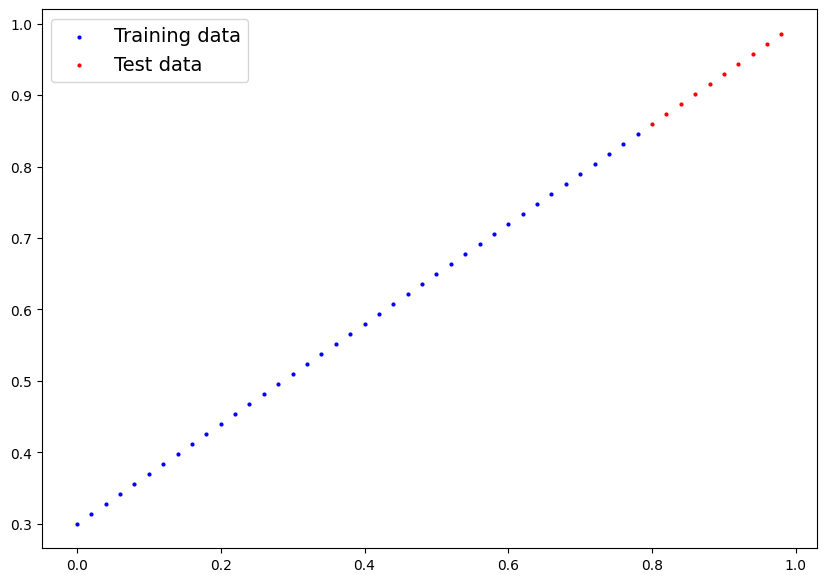

In [ ]:
plot_data()

Building Model


In [ ]:
#make linear regression model class with parent class nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights= nn.Parameter(torch.randn(1), #staring with a random weight
                               requires_grad=True)
    self.bias= nn.Parameter(torch.randn(1),#starting with a rnadom bias
                               requires_grad=True)#grad is required here and in weights definintion for using gradient descent algorithm# pytorch works well with float32
  def forward(self, x:torch.Tensor) -> torch.Tensor: #x is input data
    return self.weights *x + self.bias #linear regression

In [ ]:
'''
all model building essentials
torch.nn: contains all computational graphs for building neural networks
torch.nn.Parameter: which parameters are supposed to be learned by our model
torch.nn.Module:base class for all neural networks, models built in its subclass
torch.optim:optimizers in PyTorch live here(they help with optimizing algorithms e.g. gradient descent)
def forward(): required by all nn.module subclasses, function to be calculated, defines what happens in the forward computation
'''

'\nall model building essentials\ntorch.nn: contains all computational graphs for building neural networks\ntorch.nn.Parameter: which parameters are supposed to be learned by our model\ntorch.nn.Module:base class for all neural networks, models built in its subclass\ntorch.optim:optimizers in PyTorch live here(they help with optimizing algorithms e.g. gradient descent)\ndef forward(): required by all nn.module subclasses, function to be calculated, defines what happens in the forward computation\n'

In [ ]:
#creating instance of class LinearRegressionModel
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([1.0291], requires_grad=True),
 Parameter containing:
 tensor([0.4947], requires_grad=True)]

In [ ]:
with torch.inference_mode():
  y_preds=model_0(x_test)

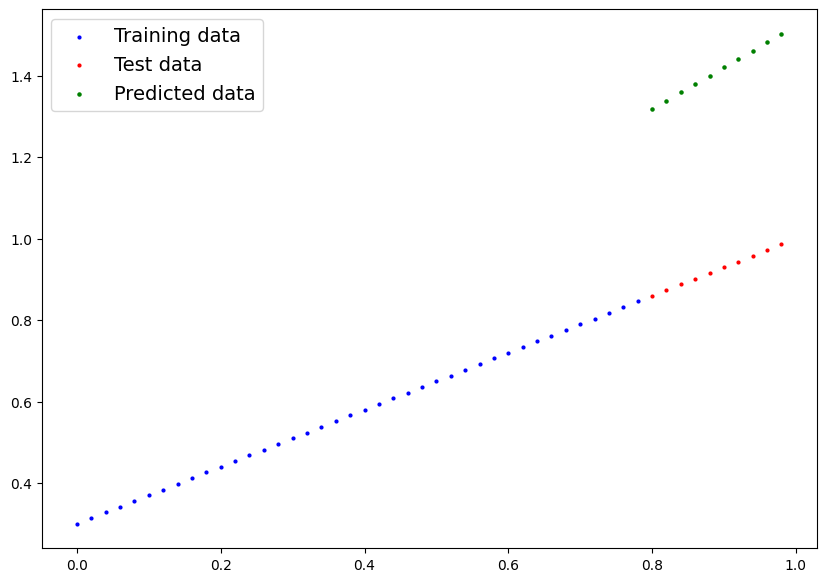

In [ ]:
plot_data(predictions=y_preds)

In [ ]:
#setting up loss function
loss_fn=nn.L1Loss()

#set up optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),#params specifies which parameters need to be optimized
                          lr=0.001)#lr specifies the learning rate of the model(default is 0.1)

torch.nn.modules.loss.L1Loss

Building a training loop for pytorch
Things to be done:
1. Loop through the data
2. Forward Pass
3. Calculate Loss
4. Optimizer Zero Grad
5. Loss Backward
6. Optimizer Step

In [1]:
 #epoch is a loop through the data
 epochs=1
 #Training through loop
 for epoch in range(epochs):
  #set the model to training mode
  model_0.train()
  #forward pass
  y_pred=model_0(X_train)
  #calculate the loss
  loss=loss_fn(y_pred,y_train)
  #optimizer zero_grad
  optimizer.zero_grad()
  #perform backpropogation wrt parameters of the model
  loss.backward()
  #perform optimizer step from gradient descent
  optimizer.step()
  ###Testing
  model_0.eval()

NameError: ignored